In [79]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style
import seaborn as sns
## This sets the plot style
## to have a grid on a white background
set_style("white")

# For preparing data 
from sklearn.model_selection import train_test_split

#For neural network
from tensorflow import keras 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image

## Importing the things
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
#from keras.utils import to_categorical
import json

#import skimage
#print(skimage.__version__)

import warnings
warnings.filterwarnings('ignore')

## Checks what is tensorflow running on
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
from PIL import Image
import cv2
from sklearn.metrics import precision_score

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12444136067931963264
xla_global_id: -1
]


In [3]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
#load model
model = keras.models.load_model('/content/drive/MyDrive/convNetvgg16_AugFT100NYa.h5')


In [33]:
#load in data, storing paths to files and labels
birds_NY = pd.read_csv('/content/drive/MyDrive/dataNY/NYbirds.csv')
#print(labels_NY.loc[labels_NY['class index']>99,:].head(5))
birds_NY#.value_counts('class index')
data_set = birds_NY['data set']
test_paths = np.asarray(birds_NY['filepaths'][data_set=='test'])
test_labels = np.asarray(birds_NY['labels'][data_set=='test'])
test_paths = '/content/drive/MyDrive/dataNY/' + test_paths
labelsDF =  pd.read_csv('/content/drive/MyDrive/labelsDF.csv')
birds_NY


,class index,filepaths,labels,data set
0,7,train/ALBATROSS/001.jpg,ALBATROSS,train
1,7,train/ALBATROSS/002.jpg,ALBATROSS,train
2,7,train/ALBATROSS/003.jpg,ALBATROSS,train
3,7,train/ALBATROSS/004.jpg,ALBATROSS,train
4,7,train/ALBATROSS/005.jpg,ALBATROSS,train
...,...,...,...,...
15935,82,valid/BROWN CREPPER/1.jpg,BROWN CREPPER,valid
15936,82,valid/BROWN CREPPER/2.jpg,BROWN CREPPER,valid
15937,82,valid/BROWN CREPPER/3.jpg,BROWN CREPPER,valid
15938,82,valid/BROWN CREPPER/4.jpg,BROWN CREPPER,valid


In [81]:
#convert original labels to match the model labesls
real_labels = np.zeros(len(test_labels))
for i in range(len(real_labels)):
  real_labels[i] = labelsDF['label_index'][labelsDF['labels']==test_labels[i]]

In [94]:
#use the model to predict on the test set
preds = np.zeros((len(test_paths)))
for i in range(len(test_paths)):
  x = np.asarray(Image.open(test_paths[i]))
  x = cv2.resize(x,(224,224))
  x = np.expand_dims(x,axis=0)
  preds[i] = np.argmax(model.predict(x))


In [101]:
from sklearn.metrics import recall_score

In [99]:
#define confusion matrix and print out precision score
matrix = confusion_matrix(real_labels,preds,normalize='true')
precision_score(real_labels,preds,average='macro')

0.8075378853172969

In [102]:
recall_score(real_labels,preds,average='macro')

0.7559999999999999

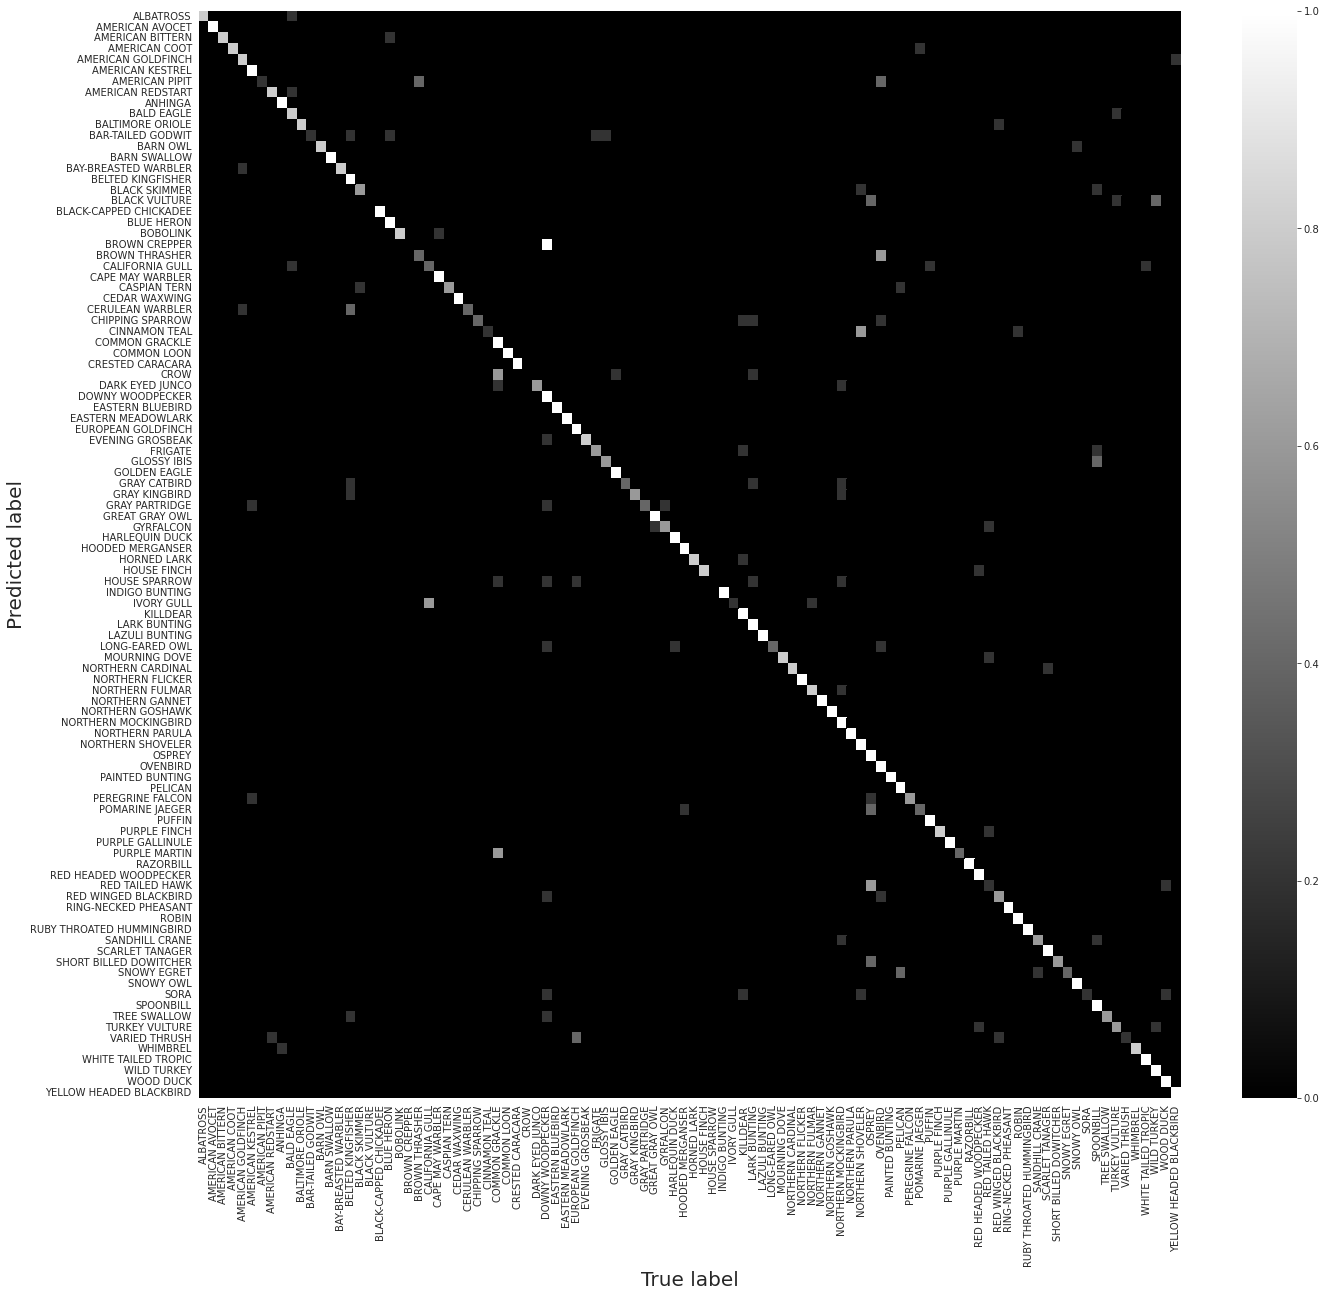

In [78]:
#plot confusion matrix
figure = plt.figure(figsize=(22, 20))
sns.heatmap(matrix,cmap=plt.cm.gist_gray, xticklabels=np.asarray(labelsDF['labels']), yticklabels=np.asarray(labelsDF['labels']))

plt.xlabel('True label',size = 20)
plt.ylabel('Predicted label',size = 20)

plt.savefig('/content/drive/MyDrive/confusion_matrix.png',bbox_inches = 'tight')

plt.show()